# Creating GD Regressor class

In [71]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [72]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

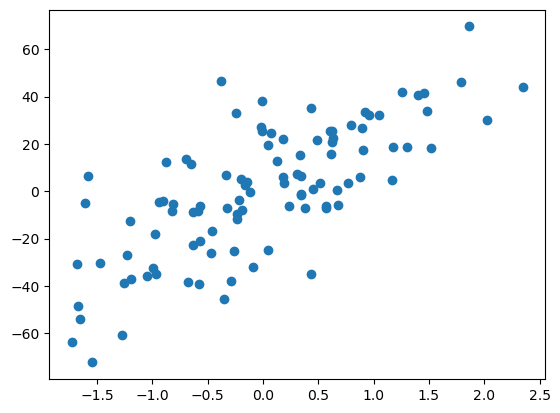

In [73]:
plt.scatter(X,y)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(X,y)

LinearRegression()

In [78]:
print(lr.coef_)
print(lr.intercept_)

[22.22570204]
0.3968174929125411


In [79]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.40747044407978106

In [80]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        
        #calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2* np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2* np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.b,self.m)
        
    def predict(self,X):
        return self.m* X + self.b

In [81]:
gd = GDRegressor(0.009,50)

In [82]:
gd.fit(X,y)

0.394975488252867 22.225790293805407


In [83]:
gd.predict(X)

array([[-37.00691463],
       [ 20.79267207],
       [-21.70601982],
       [-21.20024538],
       [ 12.97652679],
       [  1.46334193],
       [  0.27260292],
       [-32.37884481],
       [  9.94805168],
       [ 19.91135805],
       [-20.53524516],
       [ -6.80847624],
       [ 14.27366801],
       [ 10.36251107],
       [ 15.20402637],
       [  3.27003528],
       [ -3.93247086],
       [-12.36727395],
       [  4.46172482],
       [ 17.46276742],
       [ -1.70158985],
       [ -2.2058089 ],
       [ 20.47854623],
       [-13.7136469 ],
       [ 45.41869053],
       [-12.16175043],
       [ 31.52792898],
       [ 14.0685231 ],
       [  7.22787344],
       [ 33.36447092],
       [ 18.02847594],
       [ 14.33851521],
       [  7.96764137],
       [  5.57677311],
       [-19.77804984],
       [-36.38078406],
       [ 29.32049895],
       [ 15.44492998],
       [-14.05099767],
       [-21.07153832],
       [ 40.20831453],
       [-17.69441126],
       [ -5.42029713],
       [-26

In [85]:
print(lr.coef_)
print(lr.intercept_)

[22.22570204]
0.3968174929125411


In [86]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [87]:
lr.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5635402302951731

In [89]:
gd.fit(X_train,y_train)

-0.1576644340783991 23.368770769405607


In [90]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5635402302951729